In [1]:
import numpy as np
import h5py
import keras
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import keras.backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.core import Dense, Flatten, Reshape, Activation
from keras.activations import relu
import tensorflow as tf
import yolo.config as cfg
from yolo.process import preprocess

Using TensorFlow backend.


In [2]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img

In [25]:
model = VGG16(weights='imagenet', include_top=True)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [3]:
from keras.applications.imagenet_utils import decode_predictions, preprocess_input

-58.939


NameError: name 'model' is not defined

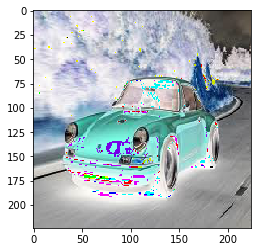

In [4]:
imagePath = 'test/my_testset/car1.jpg'
inputShape = (224,224,3)
image = load_img(imagePath, target_size=inputShape)
image = img_to_array(image)
plt.imshow(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)
print(image[0][0][0][0])
net_out = model.predict(image)
decoode_netout = decode_predictions(net_out)
print(decoode_netout)

1 <class 'numpy.ndarray'> (183, 275, 3)
2 (224, 224, 3)
3 (1, 224, 224, 3)
0.278431372549
4 <class 'numpy.ndarray'> (1, 1000)
5 669
5 [[('n03788365', 'mosquito_net', 0.14765182), ('n15075141', 'toilet_tissue', 0.041186307), ('n04209239', 'shower_curtain', 0.016662873), ('n02786058', 'Band_Aid', 0.014968914), ('n03291819', 'envelope', 0.01396073)]]


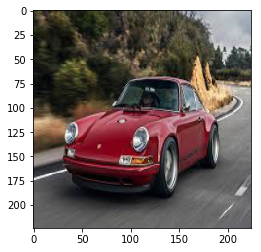

In [32]:
imagePath = 'test/my_testset/car1.jpg'
im = cv2.imread(imagePath)
print("1", type(im), im.shape)
# batch = np.expand_dims(im, axis=0)
im = preprocess(im)
# batch = preprocess_input(batch)
print("2", im.shape)
plt.imshow(im)
batch = np.expand_dims(im, axis=0)
print("3", batch.shape)
print(batch[0][0][0][0])
net_out = model.predict(batch)
print("4", type(net_out), net_out.shape)
am = np.argmax(net_out)
print("5", am)
decoode_netout = decode_predictions(net_out)
print("5", decoode_netout)

In [33]:
model.save_weights('models/pretrain/vgg16_tfdim_top.h5')

In [34]:
model.save('models/pretrain/vgg16_tfdim_top_fullmodel.h5')

## Depregate

In [14]:
pretrained_weights_path = 'models/pretrain/vgg16_weights.h5'
img_width, img_height, img_channel = 224, 224, 3

In [11]:
print(K.image_dim_ordering())
print(K.image_data_format())

tf
channels_last


In [19]:
model_vgg = Sequential()
model_vgg.add(ZeroPadding2D((1, 1), input_shape=(img_width, img_height,3)))
model_vgg.add(Conv2D(64, (3, 3), activation='relu', name='conv1_1'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Conv2D(64, (3, 3), activation='relu', name='conv1_2'))
model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Conv2D(128,(3, 3), activation='relu', name='conv2_1'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Conv2D(128, (3, 3), activation='relu', name='conv2_2'))
model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Conv2D(256, (3, 3), activation='relu', name='conv3_1'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Conv2D(256, (3, 3), activation='relu', name='conv3_2'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Conv2D(256, (3, 3), activation='relu', name='conv3_3'))
model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Conv2D(512, (3, 3), activation='relu', name='conv4_1'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Conv2D(512, (3, 3), activation='relu', name='conv4_2'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Conv2D(512, (3, 3), activation='relu', name='conv4_3'))
model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Conv2D(512, (3, 3), activation='relu', name='conv5_1'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Conv2D(512, (3, 3), activation='relu', name='conv5_2'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Conv2D(512, (3, 3), activation='relu', name='conv5_3'))
model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

f = h5py.File(pretrained_weights_path)
for k in range(f.attrs['nb_layers']):
    if k >= len(model_vgg.layers) - 1:
    # we don't look at the last two layers in the savefile (fully-connected and activation)
        break
    g = f['layer_{}'.format(k)]
    weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
    layer = model_vgg.layers[k]

    if layer.__class__.__name__ in ['Conv1D', 'Conv2D', 'Conv3D', 'AtrousConvolution2D']:
        weights[0] = np.transpose(weights[0], (2, 3, 1, 0))

    layer.set_weights(weights)
f.close()
print("VGG16 Model with No Top loaded...")
model_vgg.summary()

VGG16 Model with No Top loaded...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_40 (ZeroPaddi (None, 226, 226, 3)       0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_41 (ZeroPaddi (None, 226, 226, 64)      0         
_________________________________________________________________
conv1_2 (Conv2D)             (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_42 (ZeroPaddi (None, 114, 114, 64)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 112, 1

In [22]:
type(model_vgg)

keras.models.Sequential

In [ ]:
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.applications.imagenet_utils import decode_predictions, preprocess_input

In [ ]:
from yolo.process import preprocess

In [ ]:
imagePath = 'test/my_testset/car1.jpg'
inputShape = (224,224,3)
# image = load_img(imagePath, target_size=inputShape)
# image = img_to_array(image)
# plt.imshow(image)
image = cv2.imread(imagePath).astype(np.float32)
print("1", image.shape)
image = preprocess(image)
print("2", image.shape)
image = np.expand_dims(image, axis=0)
print("3", image.shape)
# image = preprocess_input(image)
# print(image[0][0][0][0])
net_out = model.predict(image)
decoode_netout = decode_predictions(net_out)
print(decoode_netout)